In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing customer churn data set for analysis.

In [2]:
churn = pd.read_csv(filepath_or_buffer='Customer_Churn_Data.csv',delimiter=',',encoding='latin-1')
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
churn.shape

(7043, 21)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking for blank cells with no values.

In [8]:
churn.loc[churn['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Replacing blank values in 'TotalCharges' with 0 as 'tanure' is 0 and than converting to float data type.

In [9]:
churn['TotalCharges'] = churn['TotalCharges'].replace(to_replace=' ',value='0')

In [10]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)

In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


Checking for duplicate values.

In [14]:
print(churn.duplicated().sum())

0


Checking duplicate values in CustomerID column wheather values inside that column in duplicate or unique.

In [15]:
print(churn['customerID'].duplicated().sum())

0


Converting 'SeniorCitizen' column values from numerical to categorical.

In [16]:
def convert(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

churn['SeniorCitizen'] = churn['SeniorCitizen'].apply(convert)
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **Exploratory Data Analysis**

##### **How many Customers are churned out from our company?**

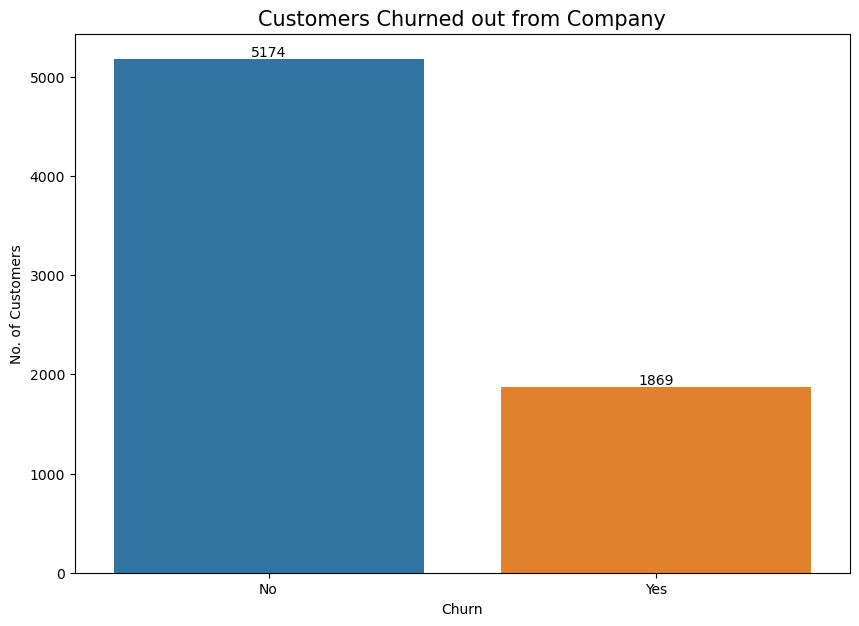

In [18]:
plt.figure(figsize=(10,7))

cco = sns.countplot(data=churn, x='Churn', hue= 'Churn')
plt.ylabel('No. of Customers')
plt.title('Customers Churned out from Company',fontsize = 15)

for bars in cco.containers:
    cco.bar_label(bars)
plt.show()

In [19]:
group_churn = churn.groupby('Churn',as_index=False)
churn_count = group_churn['customerID'].count()
churn_count

,Churn,customerID
0,No,5174
1,Yes,1869


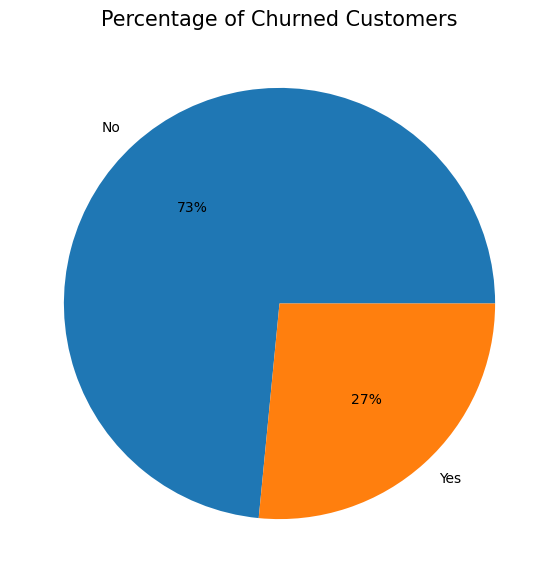

In [20]:
plt.figure(figsize=(7,7))

plt.pie(data=churn_count,x='customerID',labels='Churn',autopct='%1.0f%%')
plt.title('Percentage of Churned Customers', fontsize = 15)
plt.show()

in the above graph we can see that there are 27% of customers who churned out from the company. And now explore the reason behind it.

##### **Customer churned out based on gender?**

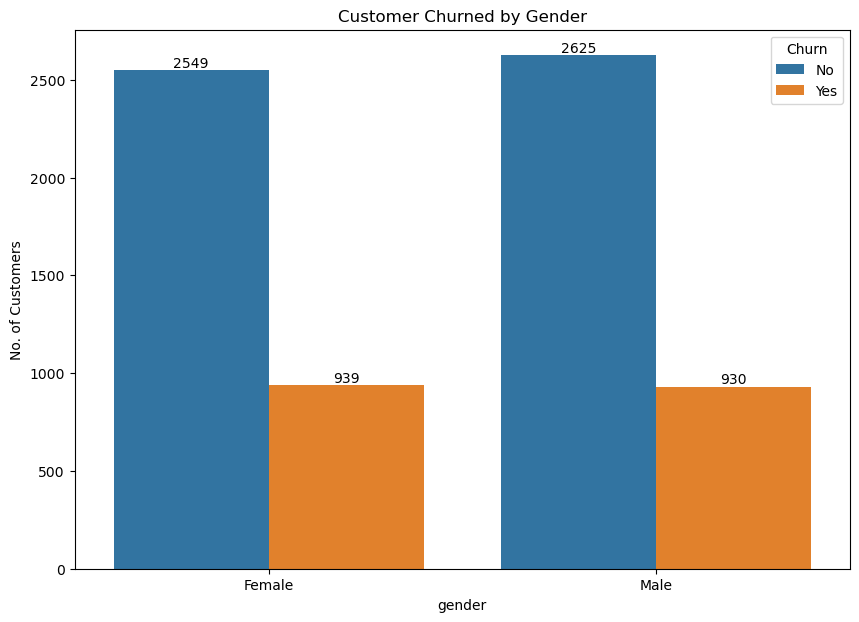

In [22]:
plt.figure(figsize=(10,7))

ccg = sns.countplot(data=churn, x='gender',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Customer Churned by Gender')

for bars in ccg.containers:
    ccg.bar_label(bars)

plt.show()

There is no impact of gender for churn.

##### **Senior Citizen churn from company or not?**

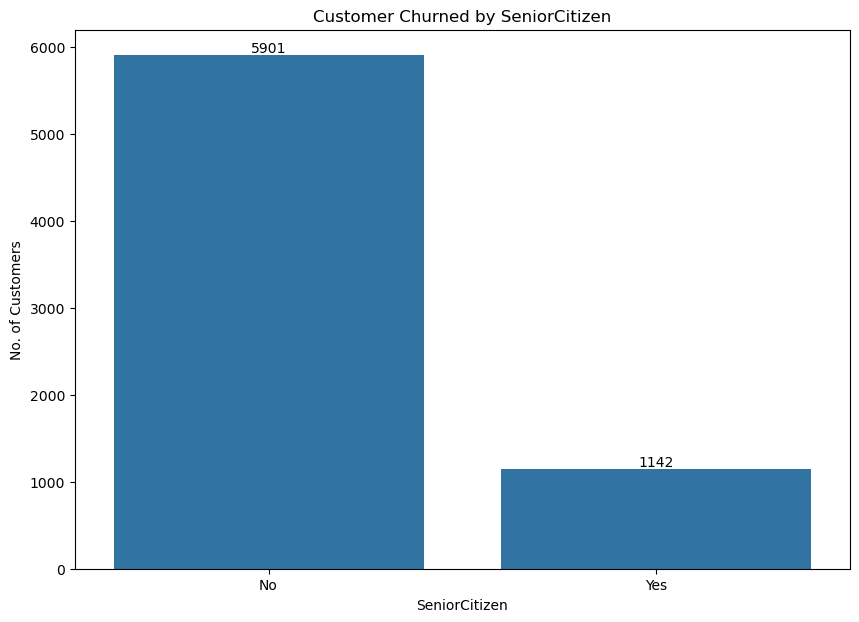

In [24]:
plt.figure(figsize=(10,7))

ccg = sns.countplot(data=churn, x='SeniorCitizen')
plt.ylabel('No. of Customers')
plt.title('Customer Churned by SeniorCitizen')

for bars in ccg.containers:
    ccg.bar_label(bars)

plt.show()

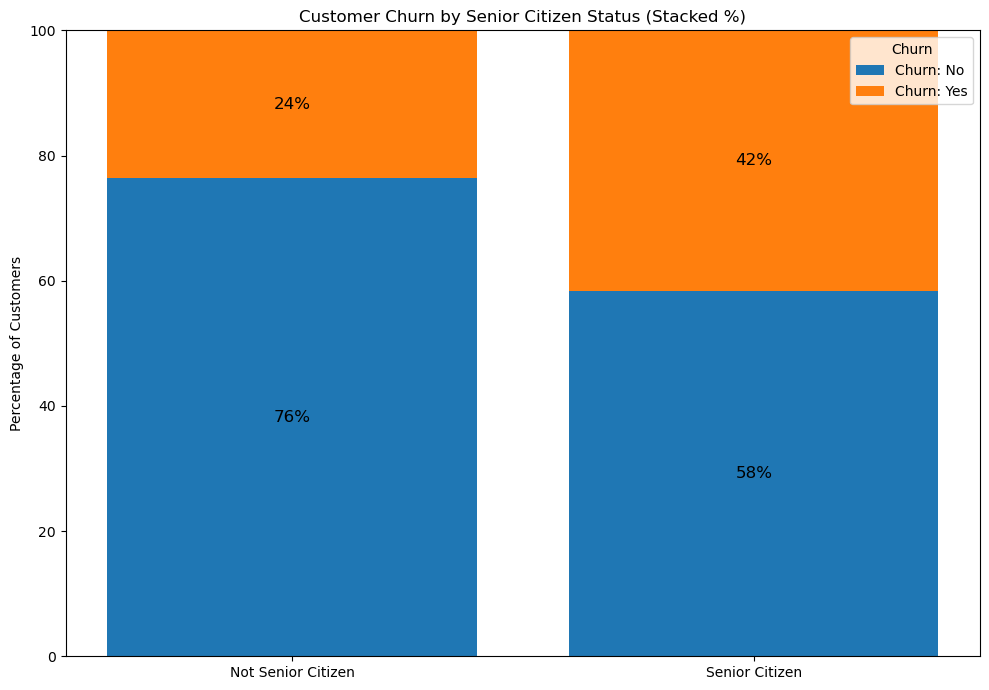

In [25]:
# Step 1: Create a contingency table (counts)
counts = churn.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Define labels and colors
labels = ['Not Senior Citizen', 'Senior Citizen']
churn_status = ['No', 'Yes']

# Step 4: Plot
plt.figure(figsize=(10, 7))
bottom = [0, 0]  # To stack bars

for i, status in enumerate(churn_status):
    values = percentages[status].values
    plt.bar(labels, values, bottom=bottom, label=f'Churn: {status}')
    
    # Add percentage labels
    for j in range(len(values)):
        plt.text(j, bottom[j] + values[j]/2, f'{values[j]:0.0f}%', ha='center', va='center', fontsize=12)
    
    bottom = [bottom[k] + values[k] for k in range(len(values))]

# Step 5: Final formatting
plt.ylabel('Percentage of Customers')
plt.title('Customer Churn by Senior Citizen Status (Stacked %)')
plt.ylim(0, 100)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

42 percent of senior citizen churned out from our company compare to 23 percent from those who are not senior citizen.

##### **How many customers churned out of our comapany whether there is dependents or not.**

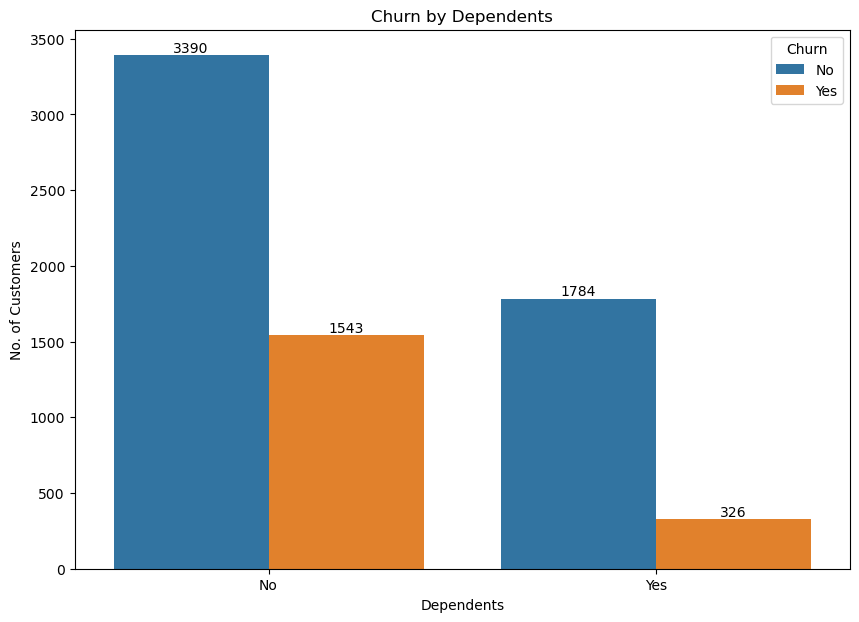

In [27]:
plt.figure(figsize=(10,7))
ccd = sns.countplot(data=churn,x='Dependents',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Dependents')

for bars in ccd.containers:
    ccd.bar_label(bars)
plt.show()

Customers with no dependent are more likely to left the company.

##### **Churn of cusomers based on tanure?**

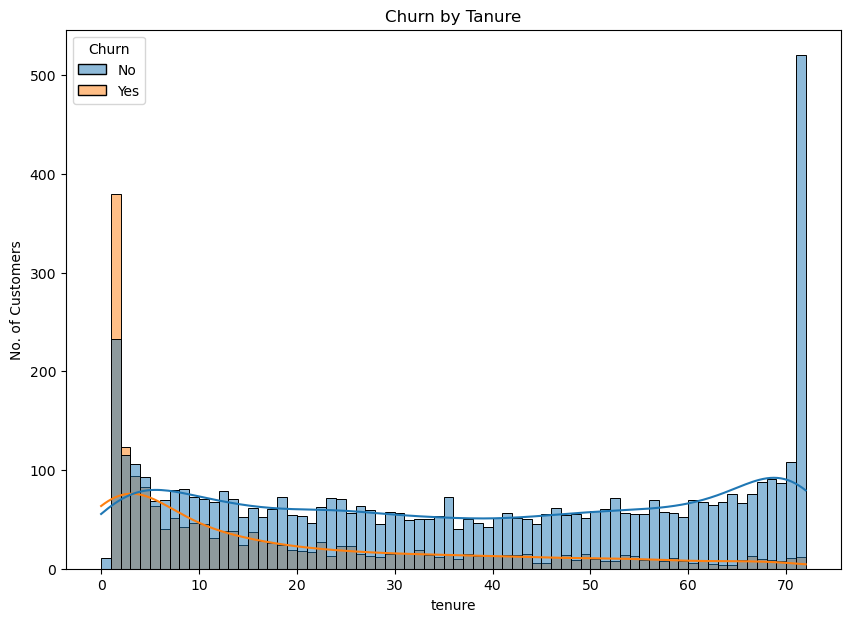

In [29]:
plt.figure(figsize=(10,7))
sns.histplot(data=churn,x='tenure',bins=72,kde=True,hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Tanure')
plt.show()

Customers who have used our services for a long time have stayed with us and customers who have used our services for 1 or 2 months have churned out from our comapany.

##### **How many customers churned out from our company based on Phone Service?**

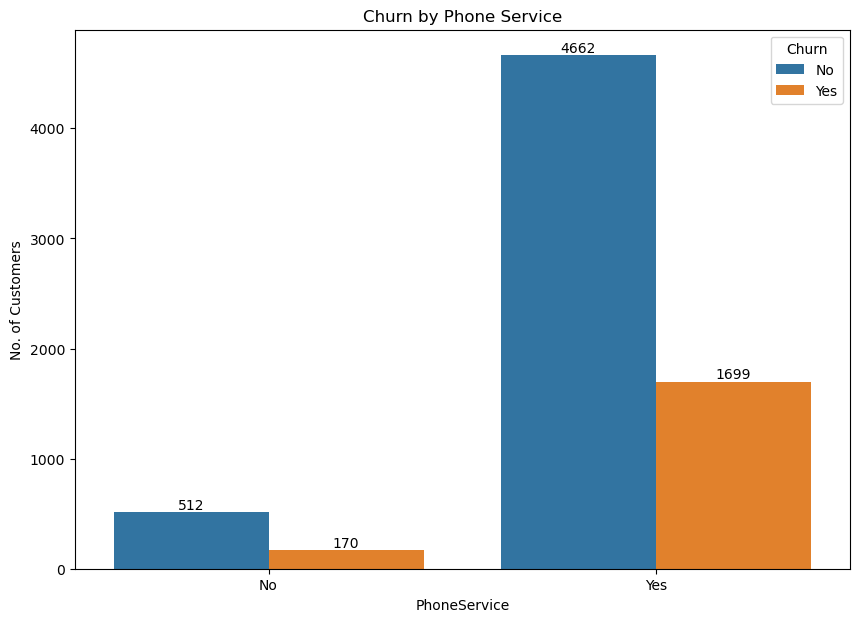

In [31]:
plt.figure(figsize=(10,7))
ccps = sns.countplot(data=churn,x='PhoneService',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Phone Service')

for bars in ccps.containers:
    ccps.bar_label(bars)
plt.show()

Customer those who have Phone Service as well are more likely to left the company.

##### **How many customers churned out based on Internet Service?**

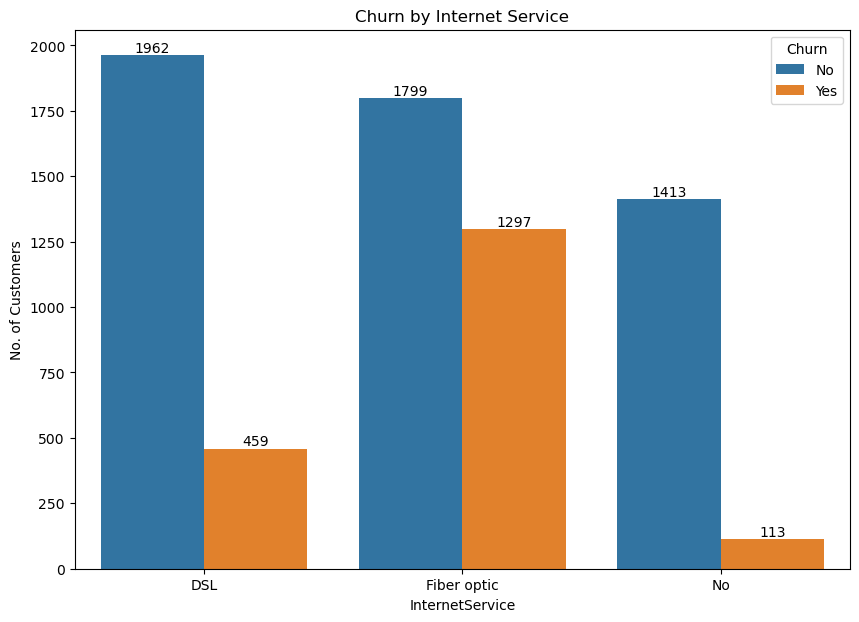

In [33]:
plt.figure(figsize=(10,7))
ccis = sns.countplot(data=churn,x='InternetService',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Internet Service')

for bars in ccis.containers:
    ccis.bar_label(bars)
plt.show()

Most Customers with Fiber Optic connection are lefting our company followed with 'DSL' Connection type.

##### **How many customers churned out based on whether they have Online Security or not?**

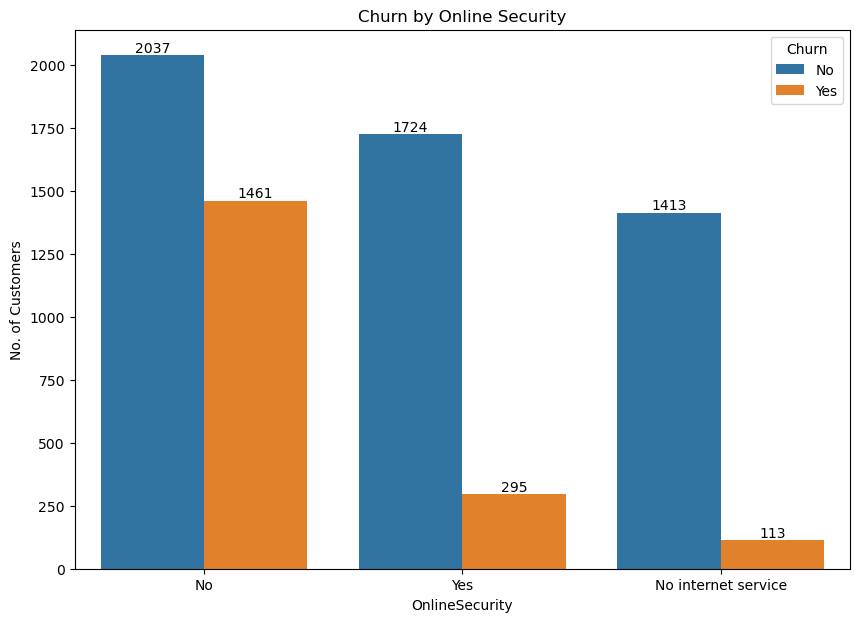

In [35]:
plt.figure(figsize=(10,7))
ccis = sns.countplot(data=churn,x='OnlineSecurity',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Online Security')

for bars in ccis.containers:
    ccis.bar_label(bars)
plt.show()

Customer those who don't have opted for online security are more likely to left the services of our company.

##### **How many customers are opted for Online Backup and churned or not?** 

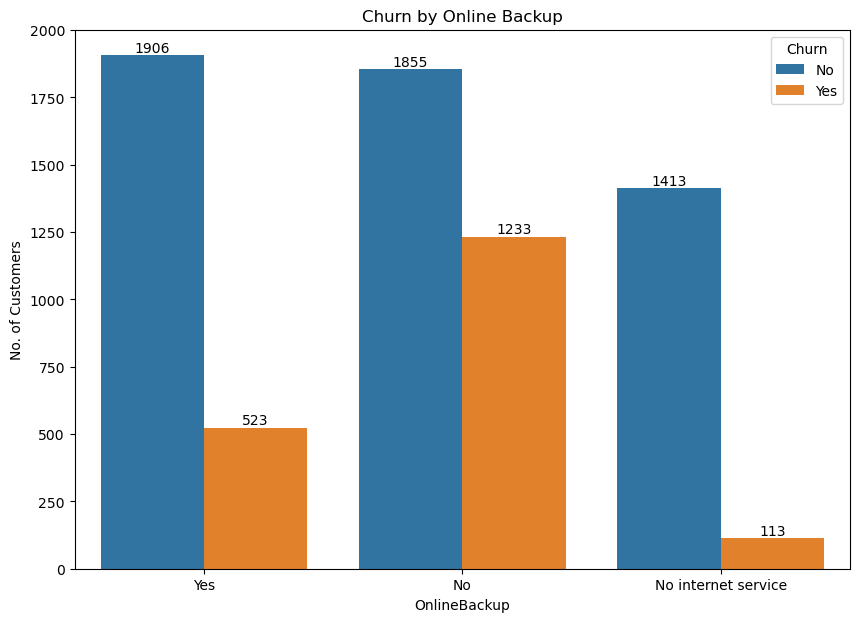

In [37]:
plt.figure(figsize=(10,7))
ccc = sns.countplot(data=churn,x='OnlineBackup',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Online Backup')

for bars in ccc.containers:
    ccc.bar_label(bars)

plt.show()

Most customer those who are not opting for online backup are likey to churned out.

##### **How many customers are taking device protection with the connection?**

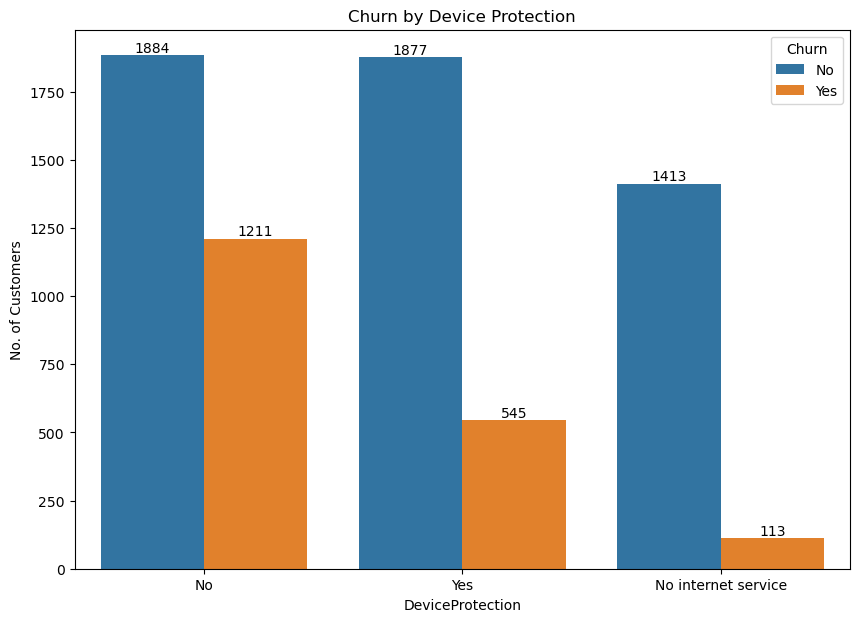

In [39]:
plt.figure(figsize=(10,7))
ccc = sns.countplot(data=churn,x='DeviceProtection',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Device Protection')

for bars in ccc.containers:
    ccc.bar_label(bars)

plt.show()

Customers those who don't take device protection are likely to churn from are company.

##### **How many customers churned based on whether they have tech support or not?**

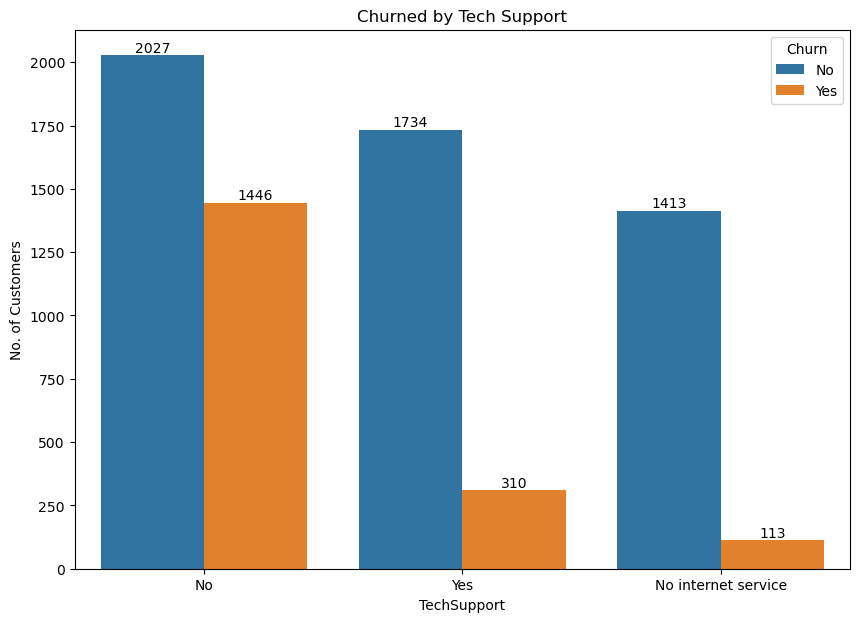

In [ ]:
plt.figure(figsize=(10,7))

ccts = sns.countplot(data=churn,x='TechSupport',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churned by Tech Support')

for bars in ccts.containers:
    ccts.bar_label(bars)
    
plt.show()

Those customers who have't opted for tech support are likely to churned out.

##### **Customers churn based on contract or Plan Duration?**

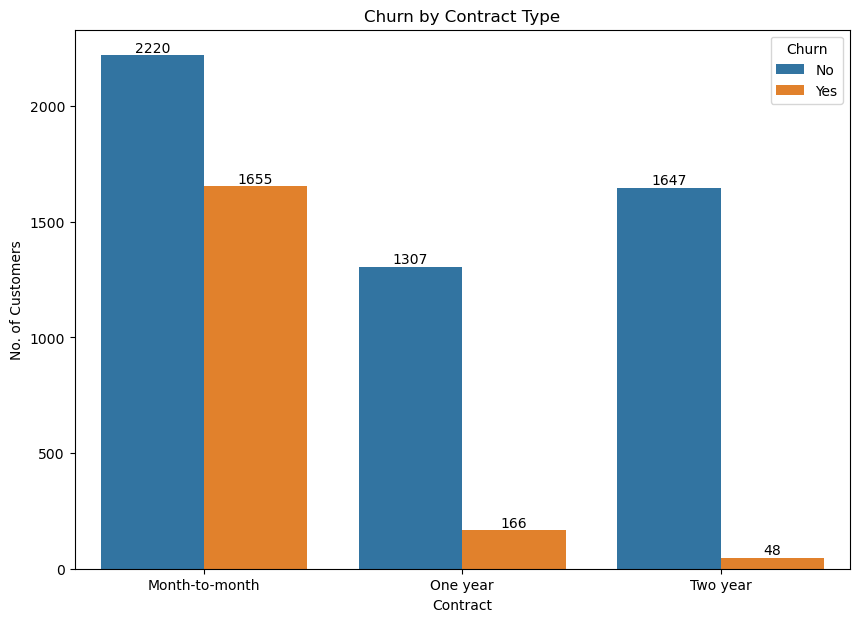

In [41]:
plt.figure(figsize=(10,7))
ccc = sns.countplot(data=churn,x='Contract',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Contract Type')

for bars in ccc.containers:
    ccc.bar_label(bars)

plt.show()

Customers with 'month to month' contract type are the highest who churned out form our comapany.

##### **Customers Churned out based on paperless billing opted or not?**

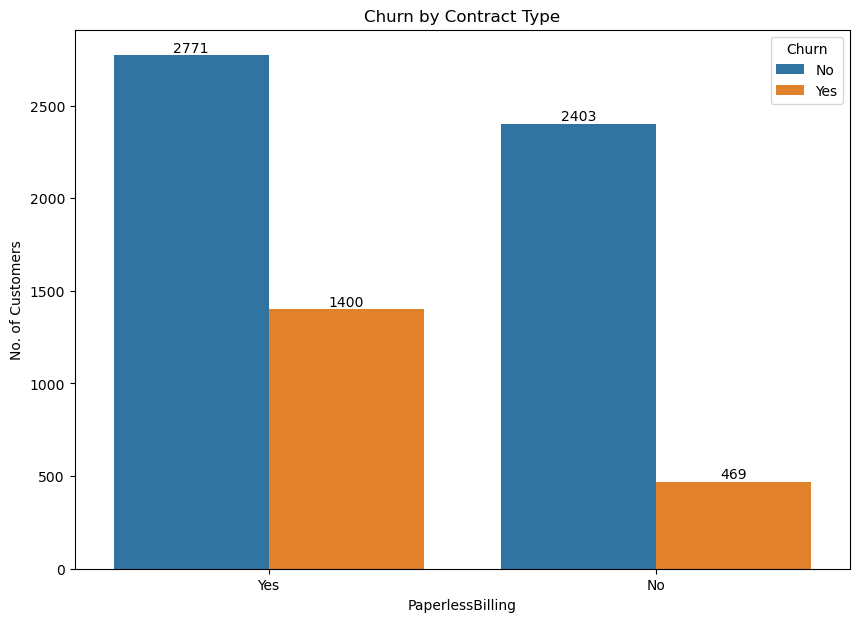

In [47]:
plt.figure(figsize=(10,7))
ccc = sns.countplot(data=churn,x='PaperlessBilling',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Contract Type')

for bars in ccc.containers:
    ccc.bar_label(bars)

plt.show()

Customers those who opted for paperless billing are more likely to churn from our company.

##### **How many customers churned out from the company based on payment method.**

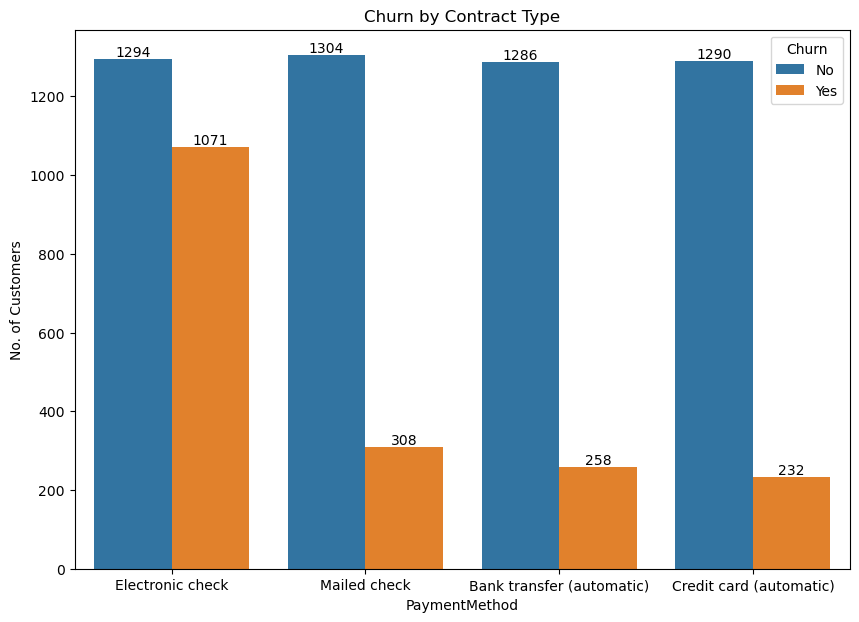

In [49]:
plt.figure(figsize=(10,7))
ccc = sns.countplot(data=churn,x='PaymentMethod',hue='Churn')
plt.ylabel('No. of Customers')
plt.title('Churn by Contract Type')

for bars in ccc.containers:
    ccc.bar_label(bars)

plt.show()

Customer those who are using Electronic Check as payment method are more likely to churn out from our company.